In our case, the problem we will be exploring is binary classification (a sample can only be one of two things).

* This is because we're going to be using a number of differnet features (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

* Given clinical parameters about a patient, can we predict whether or not they have heart disease?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv('/content/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Exploratory Data Analysis (EDA)

In [3]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

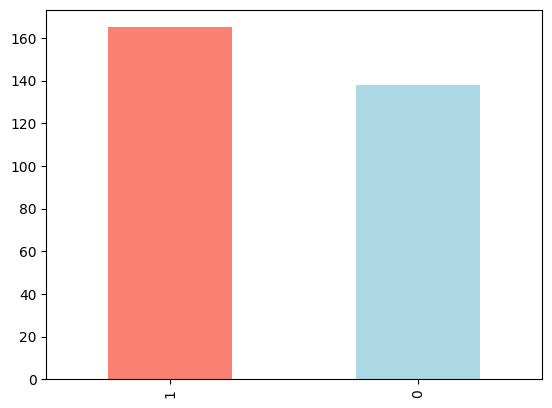

In [4]:
df["target"].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
np.array(df.isna().sum())

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Heart disease frequency according to sex

In [8]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [9]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [10]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

#### Age vs Max heart rate for heart disease

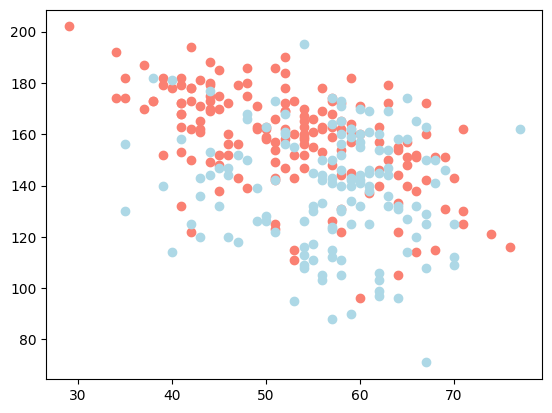

In [11]:
# Scatter with positive examples

plt.scatter(
    df.age[df.target == 1],
    df.thalach[df.target == 1],
    c = "salmon")

# Scatter with negative examples

plt.scatter(
    df.age[df.target == 0],
    df.thalach[df.target == 0],
    c = "lightblue"
)

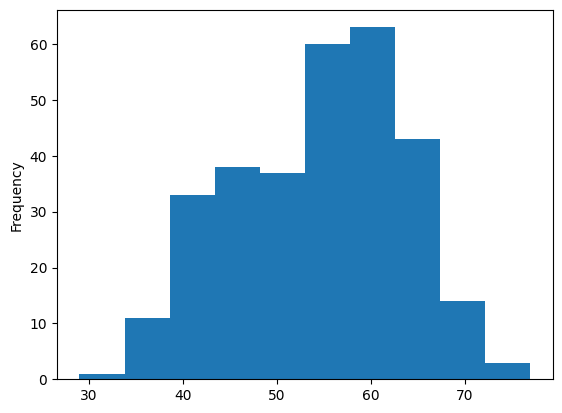

In [12]:
df.age.plot.hist();

#### Heart disease frequency per Chest pain type

In [13]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<Axes: xlabel='cp'>

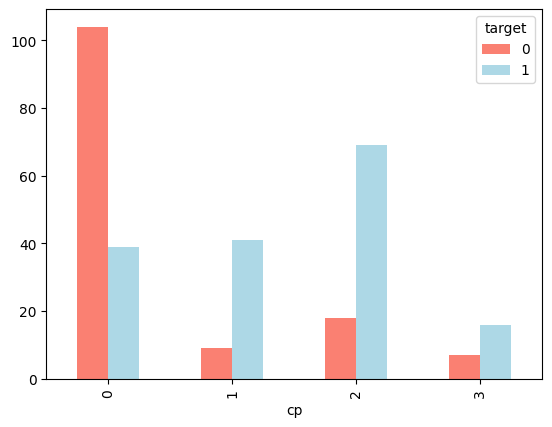

In [14]:
pd.crosstab(df.cp, df.target).plot(kind = "bar", color = ["salmon", "lightblue"])

#### Making the co-relation matrix

In [15]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


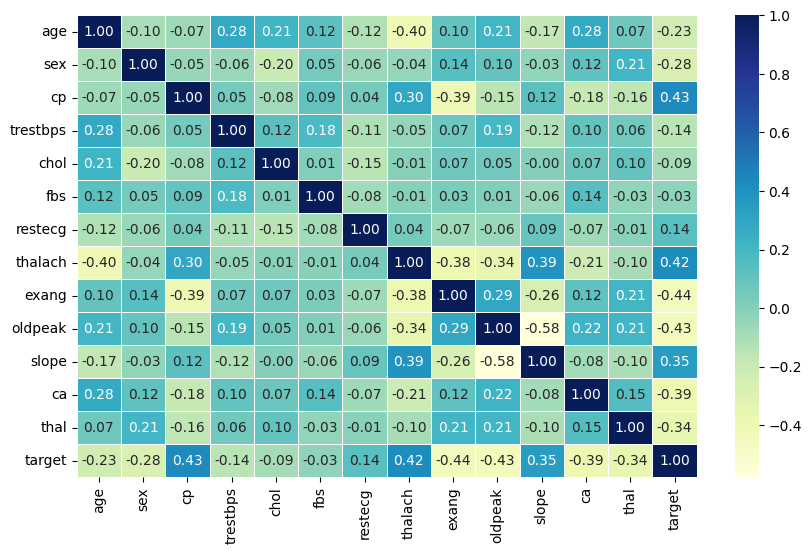

In [16]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

#### Preparing data for Machine Learning

#### Modelling

In [17]:
x = df.drop("target", axis = 1)
y = df["target"]

In [18]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [19]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(solver = 'lbfgs', max_iter = 500000),
          "Random Forest": RandomForestClassifier()}


# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [20]:
model_scores = fit_and_score(models = models,
                             X_train = x_train,
                             X_test = x_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

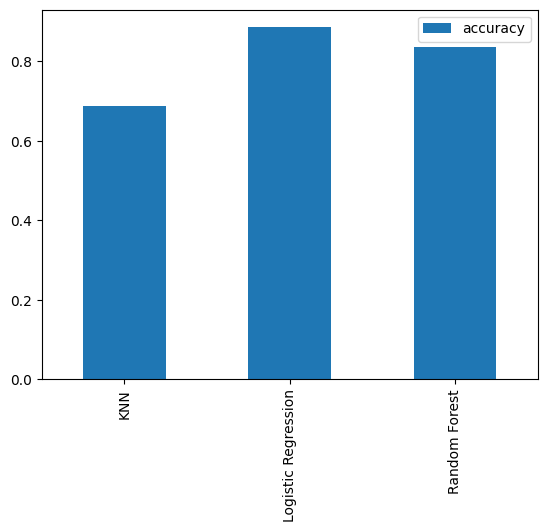

In [21]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot.bar();

In [22]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(x_train, y_train)


rs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [23]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [24]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(x_train, y_train)


rs_rf.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [25]:
rs_rf.score(x_test, y_test)

0.8688524590163934

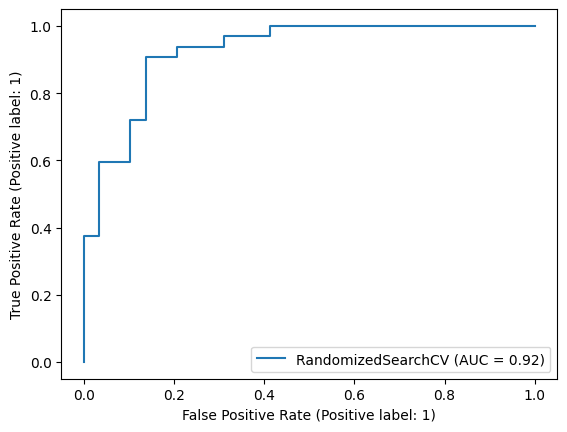

In [27]:
from sklearn.metrics import RocCurveDisplay

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator = rs_log_reg,
                               X = x_test,
                               y = y_test);

In [29]:
y_preds = rs_log_reg.predict(x_test)

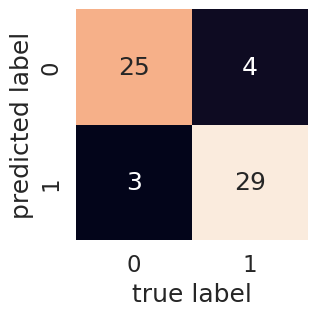

In [30]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

plot_conf_mat(y_test, y_preds)

#### Classification report

In [31]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Finding the most important features

#### Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [35]:
clf = LogisticRegression(solver = 'liblinear', C = 0.23357214690901212)

clf.fit(x_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [36]:
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [37]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699220776580221,
 'sex': -0.9042409028785717,
 'cp': 0.6747282587404362,
 'trestbps': -0.011613401339975146,
 'chol': -0.0017036439067759743,
 'fbs': 0.047876881148997324,
 'restecg': 0.3349019815885189,
 'thalach': 0.02472938284108309,
 'exang': -0.6312040612837573,
 'oldpeak': -0.5759095045469952,
 'slope': 0.4709514073081419,
 'ca': -0.6516534770577476,
 'thal': -0.6998420764664995}

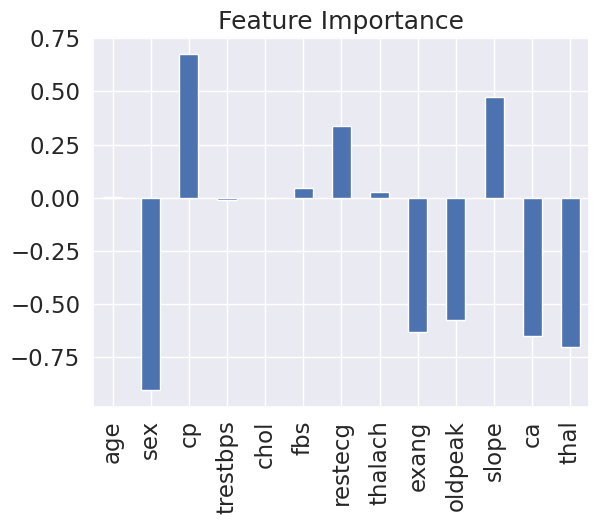

In [38]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);